# Employee Salary Prediction using Multiple Linear Regression

In [ ]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

In [ ]:
# load dataset
df=pd.read_csv('/content/Salary Data.csv')
print('first 5 rows:\n',df.head())

first 5 rows:
     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [ ]:
# basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [ ]:
# finding total missing values
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


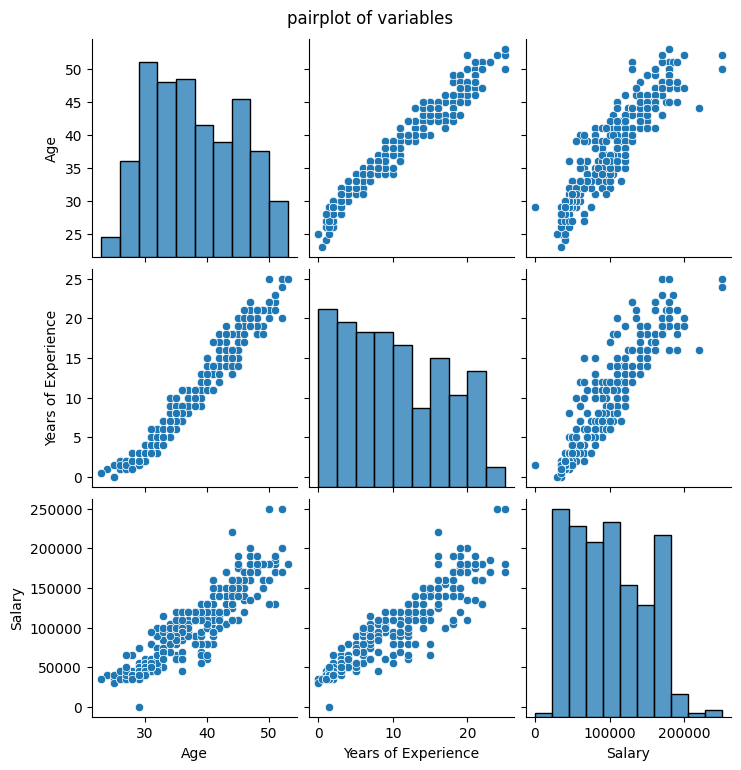

In [ ]:
# Plot pairwise relationships in a DataFrame (Age, Years of Experience and Salary)
sns.pairplot(df)
plt.suptitle('pairplot of variables',y=1.02)
plt.show()

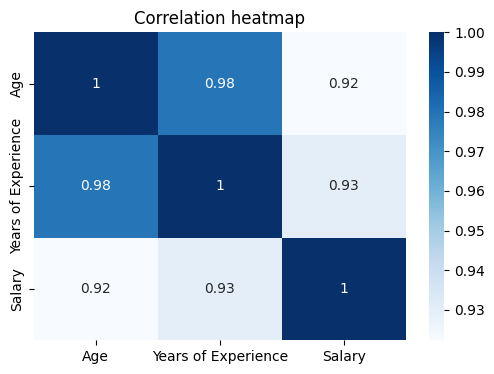

In [ ]:
# plotting correlation between each pair of variables.
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.title('Correlation heatmap')
plt.show()

 Most machine learning models (like linear regression, logistic regression, SVM, decision trees) require numerical input.

1.   Categorical variables (like 'Male', 'Manager', 'Bachelor's') are textual and non-numeric.
2.   Algorithms cannot interpret strings or categories directly — they need numbers.



In [ ]:
# Converts each categorical column into multiple binary (0/1) columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)
print("\nEncoded Columns:\n", df_encoded.columns)


Encoded Columns:
 Index(['Age', 'Years of Experience', 'Salary', 'Gender_Male',
       'Education Level_Master's', 'Education Level_PhD',
       'Job Title_Accountant', 'Job Title_Administrative Assistant',
       'Job Title_Business Analyst', 'Job Title_Business Development Manager',
       ...
       'Job Title_Supply Chain Manager', 'Job Title_Technical Recruiter',
       'Job Title_Technical Support Specialist', 'Job Title_Technical Writer',
       'Job Title_Training Specialist', 'Job Title_UX Designer',
       'Job Title_UX Researcher', 'Job Title_VP of Finance',
       'Job Title_VP of Operations', 'Job Title_Web Developer'],
      dtype='object', length=179)


In [ ]:
# Data Preprocessing (removing the rows with missing values (NaN))
df_encoded.dropna(inplace=True)

In [ ]:
# Step 7: Feature and Target Selection
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

In [ ]:
# Step 8: Impute Missing Values in X (if any)
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:

# Splitting the training/testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 10: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# display the coefficients (weights) learned by a linear model after training
print("\nModel Coefficients:")
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)



Model Coefficients:
                             Coefficient
Age                         2.477170e+03
Years of Experience         1.143458e+03
Gender_Male                 8.315781e+02
Education Level_Master's    5.293300e+03
Education Level_PhD         1.305268e+04
...                                  ...
Job Title_UX Designer      -6.205064e+03
Job Title_UX Researcher    -3.637979e-12
Job Title_VP of Finance     6.475174e+04
Job Title_VP of Operations  5.475174e+04
Job Title_Web Developer    -1.540963e+04

[178 rows x 1 columns]


In [ ]:
#Predict values on Test Data
y_pred = model.predict(X_test)
print(y_pred)


[179926.92652645  99014.90352108 119093.0796918  100000.
 130625.97011081 144230.0770327  139985.26946597 119342.03166444
  43868.50937573  98210.40605721 134732.45335712 137196.21957329
  58495.60894099  87462.01684803 116806.16328055  43868.50937573
  76789.00218188  64862.77180832  96211.99419656  92944.18639386
 118856.54179437 111995.38296941 134622.93383723  50278.18724471
 100000.          58235.34647052 164006.94511577  41520.32066617
 110215.74819173 155157.59832844  63761.82860434 111818.33985086
  69547.74622928 143124.1266059  109491.13257899  29941.95322963
 169914.48950332  68404.28802366 149301.75833244  52744.49436741
  46660.84545507  91730.64754057 144247.22216647 177640.01011519
  63449.94848232 139748.73156854 106611.11487308  65434.50091113
  48856.54179437  62618.37039871 166142.81816137  98127.11516868
 129191.32845871  92477.16977067 110000.         115613.8328489
 165466.26543968  61914.02121719 179926.92652645  96754.38405439
 109072.2899861  148348.55348622 1

In [ ]:
# Model Evaluation
print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))


Model Performance:
MAE: 11596.521058222646
MSE: 354248539.00766945
RMSE: 18821.491412947846
R-squared: 0.8522475952130931


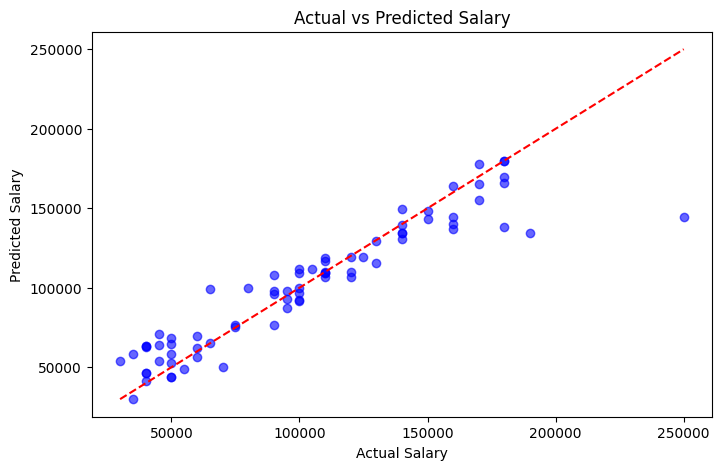

In [ ]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

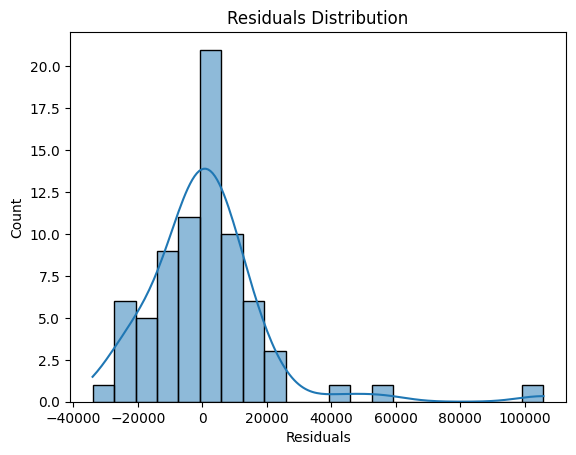

In [ ]:
# Residual Analysis (shows how your prediction errors (residuals) are distributed)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


**x-axis shows the values of the residuals, i.e., the difference between the actual and predicted values (y_test - y_pred). And Y-axis shows it's frequency (repetation)**

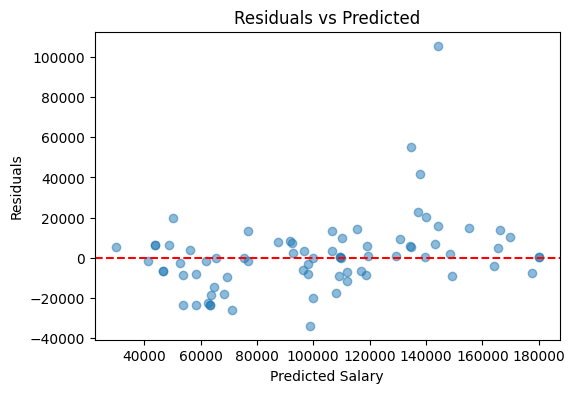

In [ ]:

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [ ]:
# Step 16: Predict Salary from New Input
def predict_salary(age, gender, education_level, job_title, years_of_experience):
    input_data = pd.DataFrame({
        'Age': [age],
        'Years of Experience': [years_of_experience],
        'Gender_' + gender: [1],
        'Education Level_' + education_level: [1],
        'Job Title_' + job_title: [1],
    })

    # Ensure all columns match
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0

    input_data = input_data[X.columns]  # Order columns
    predicted_salary = model.predict(input_data)[0]
    print(f"\nPredicted Salary for Input: NPR {predicted_salary:.2f}")
    return predicted_salary

In [ ]:
#example
predict_salary(age=30,gender='Male',education_level='Bachelors',job_title='Data Scientist',years_of_experience=15)


Predicted Salary for Input: NPR 85905.37


/tmp/ipython-input-21-3761349996.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
/tmp/ipython-input-21-3761349996.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[col] = 0
/tmp/ipython-input-21-3761349996.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inp

np.float64(85905.36795511741)